In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from astropy.table import Table

In [47]:
mid_J_mag_limit = 18
upper_J_mag_limit = 18+0.1
lower_J_mag_limit = 18-0.1

In [5]:
with h5py.File('/root/4MOST_lensing_prediction/data/SPS/vst_mags_grid_z=0.1500_fast.hdf5') as f:
    mag_grid = f['J_mag_grid'][()]
    logMstar = f['Mstar_grid'][()]

In [30]:
logMstar_tile = np.tile(logMstar,( len(mag_grid[0].reshape(-1)),1))
logMstar_tile = logMstar_tile.T.reshape(-1)

In [35]:
mag_tile = np.zeros_like(logMstar_tile)
len_Mstar = len(mag_grid[:,0,0])
len_mag = len(mag_grid[0].reshape(-1))
for i in range(len_Mstar):
    mag_tile[i*len_mag:(i+1)*len_mag] = mag_grid[i].reshape(-1)

In [38]:
sample = Table(data = {'logMstar':logMstar_tile, 'J_mag':mag_tile})

(array([81.,  0.,  0.,  0.,  0., 30.,  0.,  0.,  0.,  7.]),
 array([10.4 , 10.42, 10.44, 10.46, 10.48, 10.5 , 10.52, 10.54, 10.56,
        10.58, 10.6 ]),
 <BarContainer object of 10 artists>)

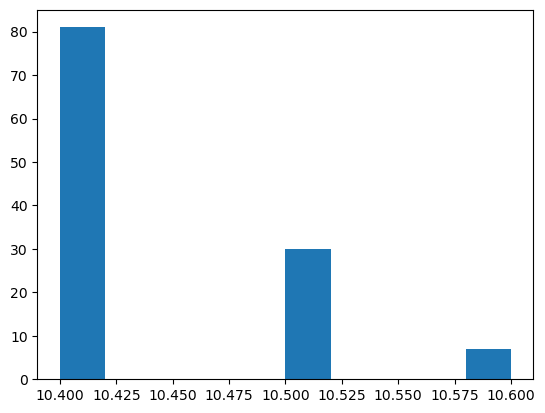

In [42]:
sample_near_lim = sample[(sample['J_mag'] < upper_J_mag_limit) & (sample['J_mag'] > lower_J_mag_limit)]
plt.hist(sample_near_lim['logMstar'])


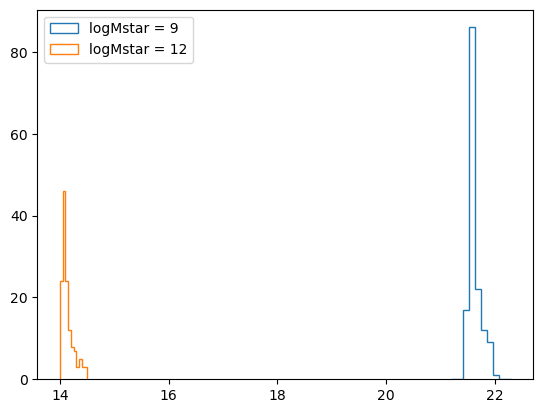

In [16]:
plt.hist(mag_grid[0].reshape(-1), bins=10, histtype='step', label='logMstar = 9',range = (21.2,22.3) )
plt.hist(mag_grid[-1].reshape(-1), bins=10, histtype='step', label='logMstar = 12', range = (14,14.5))
plt.legend()

In [43]:
with h5py.File('/root/4MOST_lensing_prediction/data/SPS/mag_sample.hdf5') as f:
    mag_1w = f['mag'][()]
    logmstar_1w = f['logmstar'][()]

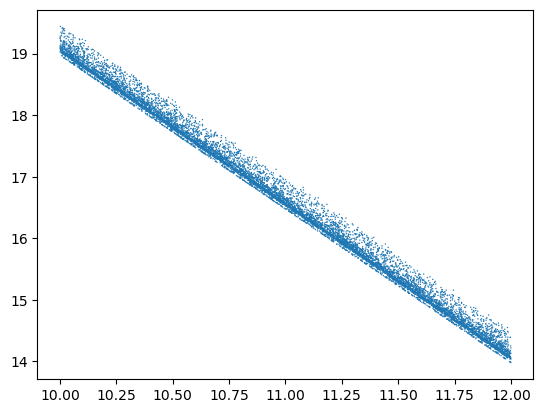

In [45]:
plt.scatter(logmstar_1w, mag_1w, s=1,edgecolors= 'none')

In [48]:
tab_1w = Table(data = {'logMstar':logmstar_1w, 'J_mag':mag_1w})
tab_1w_near_lim = tab_1w[(tab_1w['J_mag'] < upper_J_mag_limit) & (tab_1w['J_mag'] > lower_J_mag_limit)]

Text(0, 0.5, 'N')

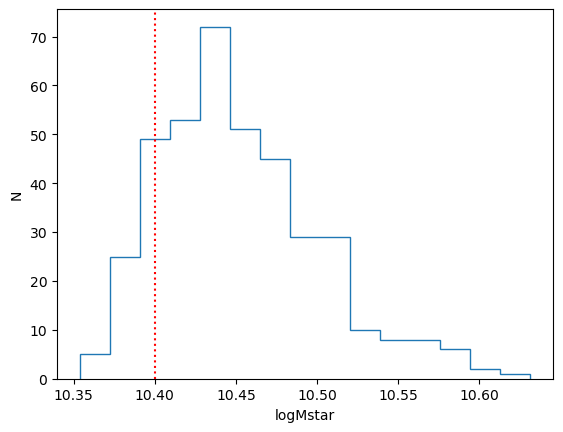

In [56]:
plt.hist(tab_1w_near_lim['logMstar'], bins=15, histtype='step', label='1w')
plt.axvline(x = 10.4, color='r', ls = ':')
plt.xlabel('logMstar')
plt.ylabel('N')